In [8]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Extracting CSV Raw Dataset From Github using Pandas Library 
#Because the given Database list: heart_disease_dataset.csv shows Folder empty 

df=pd.read_csv('https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
#All Columns in the Dataset

df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [33]:
#Checking NULL Values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
target=df.groupby('target').size()
target

target
0    138
1    165
dtype: int64

In [8]:
#Converting Numerical Data into Categorical Data

def HeartDisease(row):
    if row==0:
        return 'No'
    elif row==1:
        return 'Yes'

In [9]:
#Applying converted data into our dataset with new column - Heart_Disease

df['Heart-Disease']=df['target'].apply(HeartDisease)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart-Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Yes


In [10]:
h=df.groupby('Heart-Disease')['target'].count()
h

Heart-Disease
No     138
Yes    165
Name: target, dtype: int64

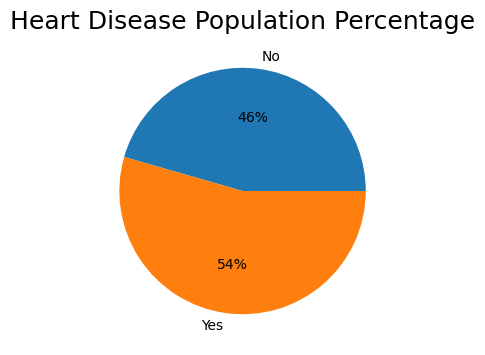

In [13]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib

plt.figure(figsize=(8,4))
plt.pie(h, labels=['No','Yes'], autopct='%0.0f%%')
plt.title('Heart Disease Population Percentage', fontsize=18)
plt.show()

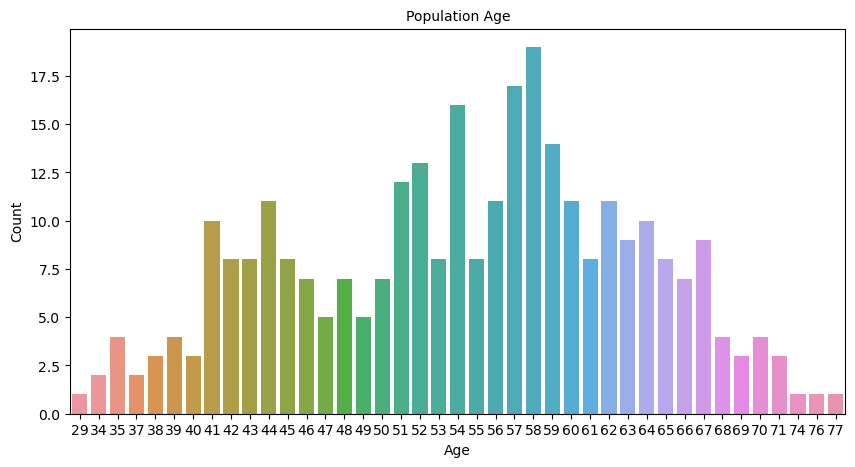

In [15]:
#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(10,5))
sns.countplot(x='age', data=df)
plt.title('Population Age', fontsize=10)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

In [16]:
#Statistical Analysis

MinAge=df['age'].min()
MaxAge=df['age'].max()
MeanAge=df['age'].mean()
print("Minimum Age =",MinAge)
print("Maximum Age =",MaxAge)
print("Mean Age =",MeanAge)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.366336633663366


In [17]:
#Categorical Analysis

YoungAges=df[(df['age']>=20) & (df['age']<40)]
MiddleAges=df[(df['age']>=35) & (df['age']<55)]
ElderlyAges=df[(df['age']>55)]
print('Young Ages =',len(YoungAges))
print('Middle Ages =',len(MiddleAges))
print('Elderly Ages =',len(ElderlyAges))

Young Ages = 16
Middle Ages = 141
Elderly Ages = 151


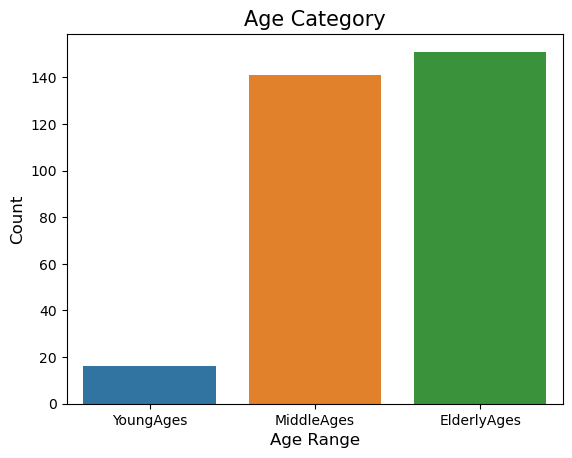

In [16]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn

sns.barplot(x=['YoungAges','MiddleAges','ElderlyAges'], y=[len(YoungAges), len(MiddleAges), len(ElderlyAges)])
plt.title('Age Category', fontsize=15)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [18]:
#Converting Numerical Data into Categorical Data

def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [19]:
#Applying converted data into our dataset with new column - Sex
df['Sex']=df['sex'].apply(gender)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart-Disease,Sex
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Yes,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Yes,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Yes,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Yes,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Yes,Female


In [20]:
#Converting Numerical Data into Categorical Data

def AgeRange(row):
    if row>=20 and row<35:
        return 'Young Age'
    elif row>=35 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [21]:
#Applying converted data into our dataset with new column - Age_Range

df['AgeRange']=df['age'].apply(AgeRange)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart-Disease,Sex,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Yes,Male,Elder Age
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Yes,Male,Middle Age
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Yes,Female,Middle Age
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Yes,Male,Elder Age
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Yes,Female,Elder Age


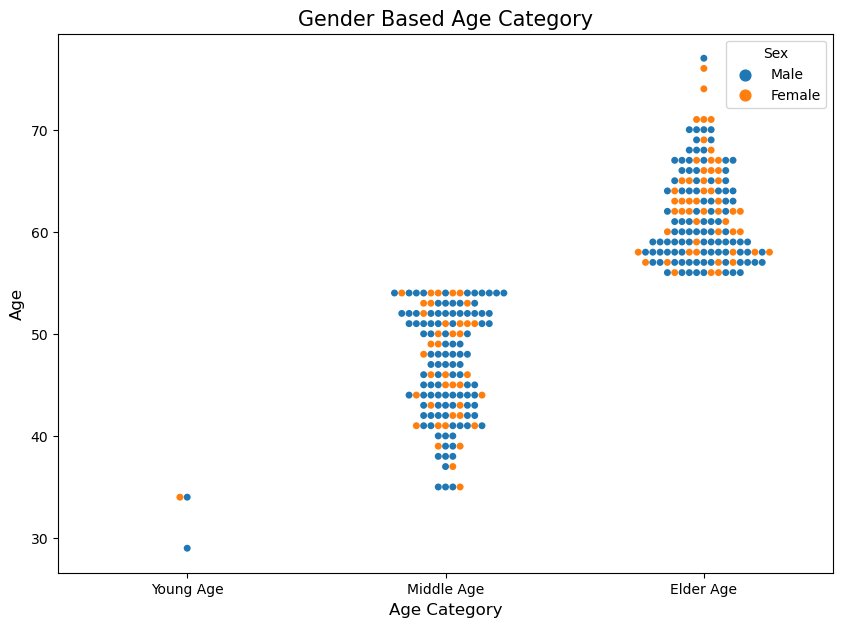

In [22]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.swarmplot(x='AgeRange', y='age', hue='Sex', data=df, order=['Young Age','Middle Age','Elder Age'])
plt.title('Gender Based Age Category', fontsize=15)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

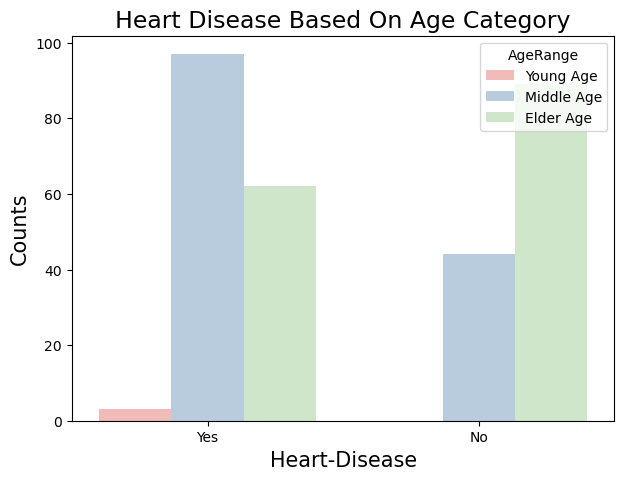

In [24]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart-Disease', hue='AgeRange', data=df, order=['Yes','No'], hue_order=hue_order,palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart-Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

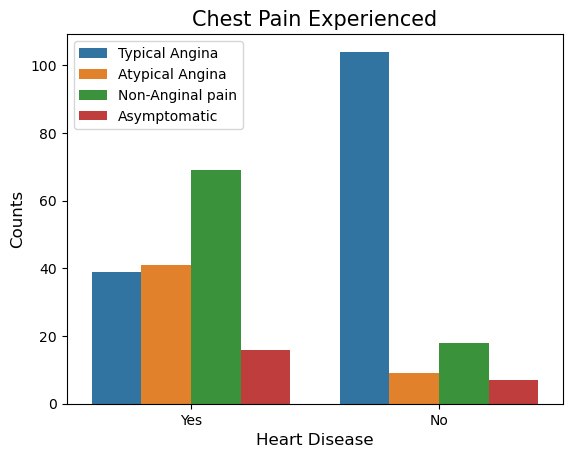

In [31]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

sns.countplot(x=df['Heart-Disease'], hue='cp', data=df, order=['Yes','No'])
plt.title('Chest Pain Experienced', fontsize=15)
plt.xlabel('Heart Disease',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

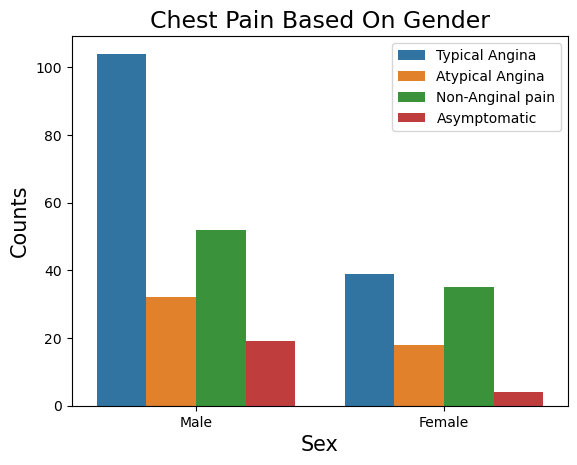

In [33]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn

sns.countplot(x=df['Sex'], hue='cp', data=df)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

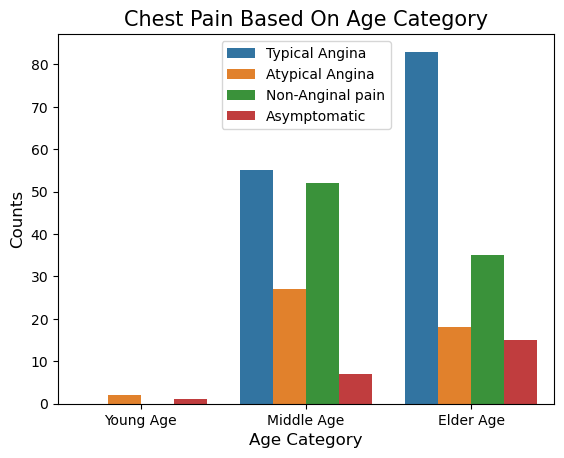

In [34]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn

sns.countplot(x=df['AgeRange'], hue='cp', data=df, order=['Young Age', 'Middle Age', 'Elder Age'])
plt.title('Chest Pain Based On Age Category', fontsize=15)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

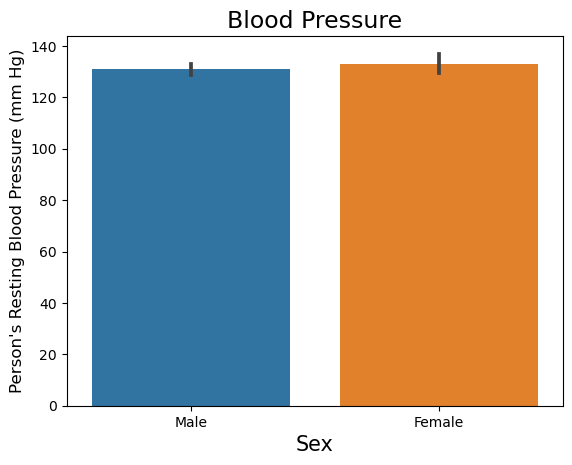

In [36]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

sns.barplot(x='Sex', y='trestbps', data=df)
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

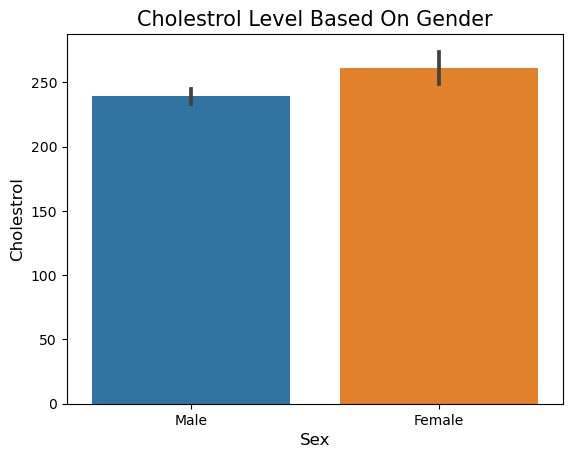

In [37]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

sns.barplot(x='Sex', y='chol', data=df)
plt.title("Cholestrol Level Based On Gender", fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.ylabel("Cholestrol", fontsize=12)
plt.show()

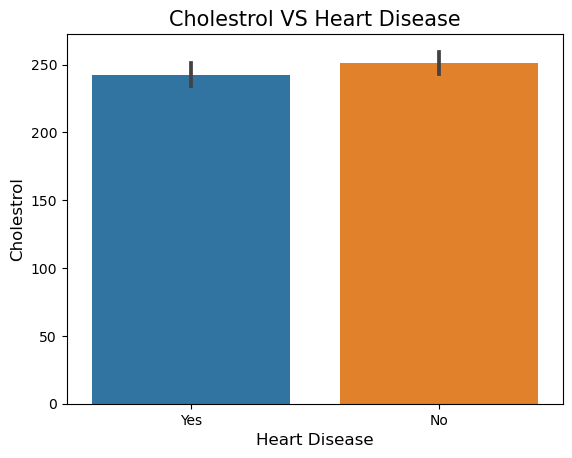

In [38]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart-Disease', y='chol', data=df)
plt.title('Cholestrol VS Heart Disease', fontsize=15)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Cholestrol', fontsize=12)
plt.show()

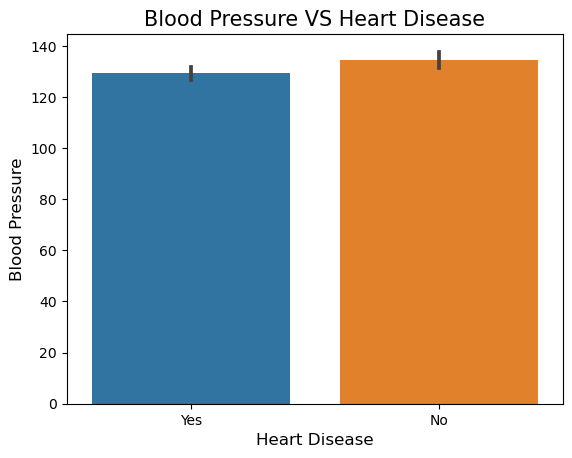

In [39]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart-Disease', y='trestbps', data=df)
plt.title('Blood Pressure VS Heart Disease', fontsize=15)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.show()

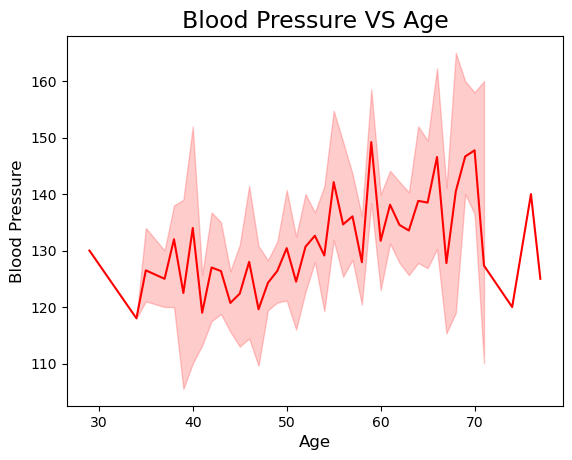

In [40]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='trestbps', data=df, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.show()

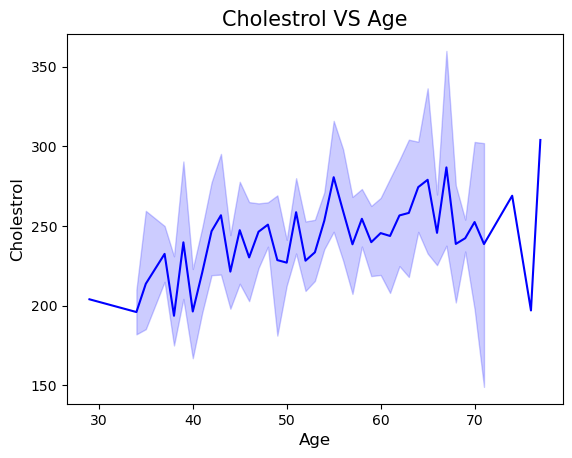

In [41]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='chol', data=df, color='b')
plt.title('Cholestrol VS Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholestrol', fontsize=12)
plt.show()

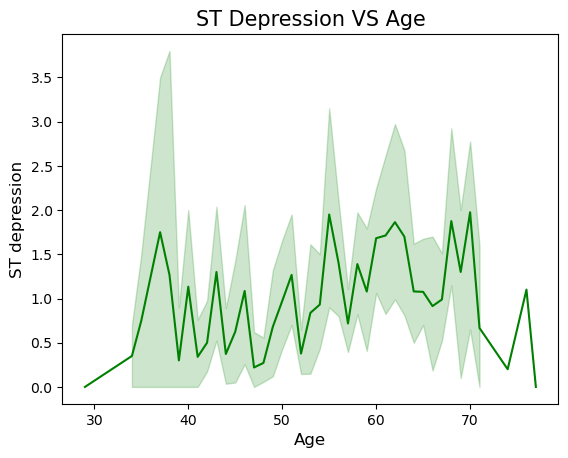

In [42]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='oldpeak', data=df, color='g')
plt.title('ST Depression VS Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('ST depression', fontsize=12)
plt.show()

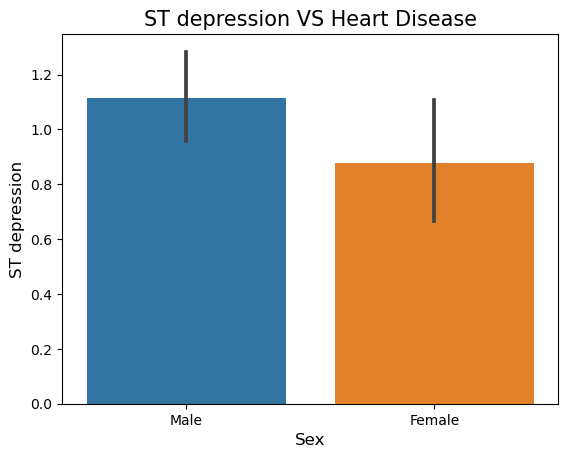

In [43]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Sex', y='oldpeak', data=df)
plt.title('ST depression VS Heart Disease', fontsize=15)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('ST depression', fontsize=12)
plt.show()

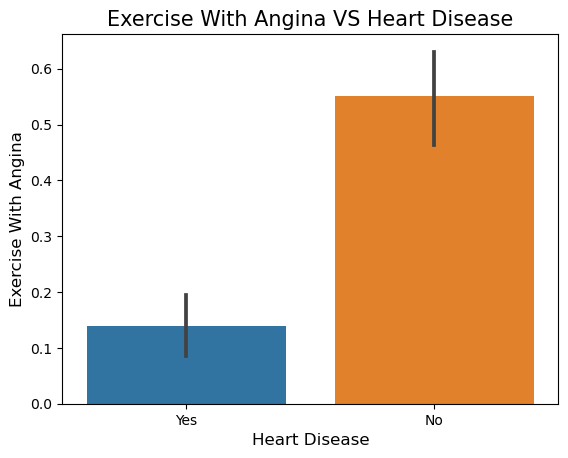

In [44]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart-Disease', y='exang', data=df)
plt.title('Exercise With Angina VS Heart Disease', fontsize=15)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Exercise With Angina', fontsize=12)
plt.show()

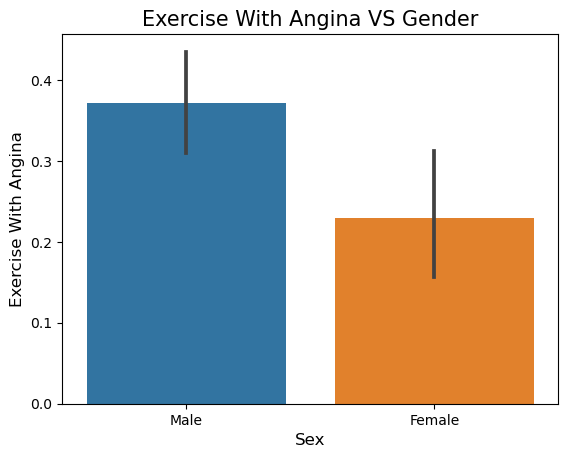

In [45]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn

sns.barplot(x='Sex', y='exang', data=df)
plt.title('Exercise With Angina VS Gender', fontsize=15)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Exercise With Angina', fontsize=12)
plt.show()

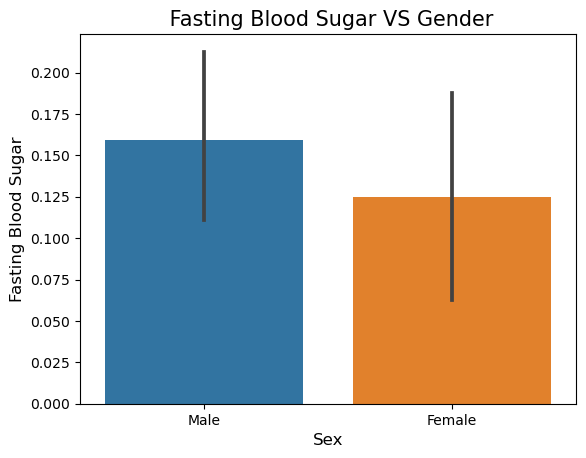

In [48]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

sns.barplot(y='fbs', x='Sex', data=df)
plt.title(' Fasting Blood Sugar VS Gender', fontsize=15)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Fasting Blood Sugar', fontsize=12)
plt.show()

<AxesSubplot:>

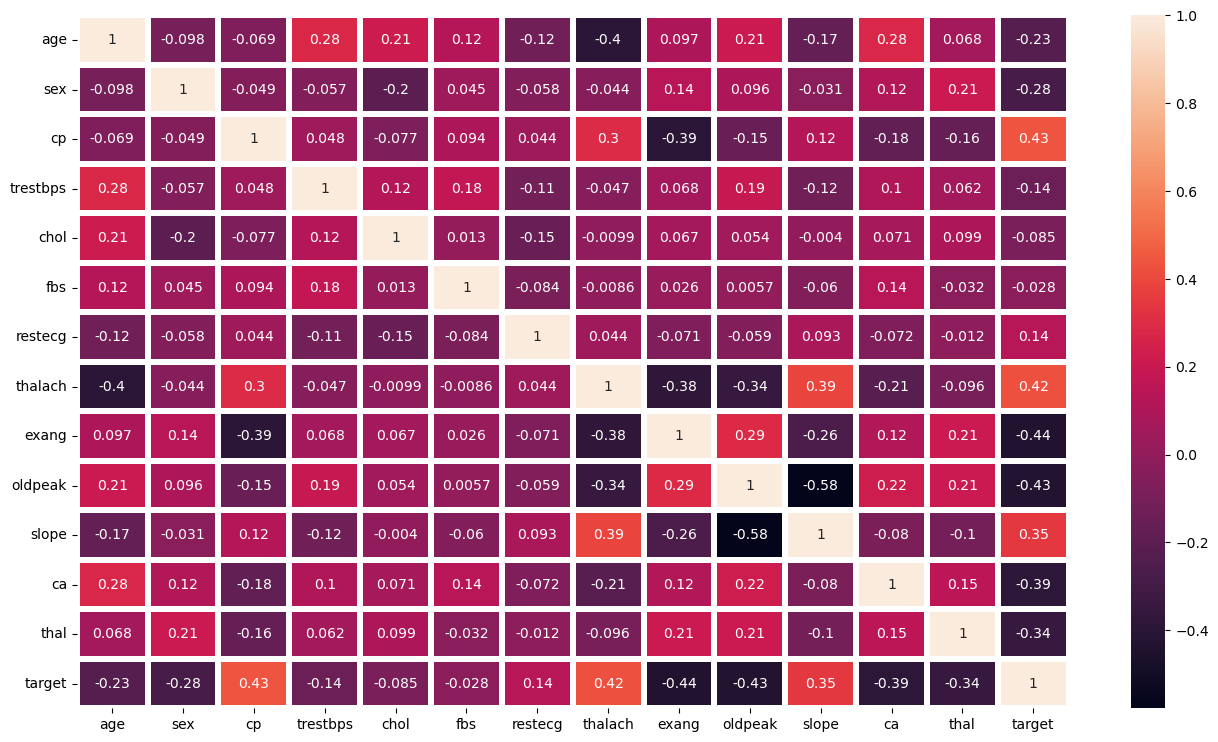

In [50]:
#Heatmap Creation using Seaborn

plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True, linewidth=3)